In [379]:
import pandas as pd
import numpy as np
import json
import string
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import random
import spacy
from wordcloud import WordCloud
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
from string import punctuation



# Data import and exploration

In [385]:
data_header = ['wikipedia_id', 'freebase_id', 'name', 'release_date', 'box_office_revenue', 'runtime', 'languages', 'countries', 'genres']
data = pd.read_csv('data/movie.metadata.tsv', sep='\t', header=None, names=data_header)
summaries_df=pd.read_table("data/plot_summaries.txt",header=None)
summaries_df.columns=["movie_id","summary"]

In [377]:

summaries_df["length"]=summaries_df["summary"].apply(len)
summaries_df["num_words"]=summaries_df["summary"].apply(lambda x: x.split()).apply(len)


In [378]:
summaries_df

,movie_id,summary,length,num_words
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",178,25
1,31186339,The nation of Panem consists of a wealthy Capi...,4559,778
2,20663735,Poovalli Induchoodan is sentenced for six yea...,3099,496
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",4917,849
4,595909,Seventh-day Adventist Church pastor Michael Ch...,2425,397
...,...,...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho...",220,40
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look...",2971,524
42300,35102018,American Luthier focuses on Randy Parsons’ tra...,871,160
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",1289,230


In [386]:
example=summaries_df.sample()
example=example.iloc[0]["summary"]
example


'In 1968, an infected man from Russia, Rubinsky , is being operated at a military hospital when soldiers arrive and begin to shoot all of those who are in the building. One of the students, DeLuca, at the hospital steals a strange vial, but he is shot by the soldiers as he attempts to escape, while the soldiers in the hospital snipe any one that has been in contact with the infected man. The zombies kill three of the soldiers and multiple hospital orderly. The rest of the zombies are killed when C4 is detonated by sharpshooters outside the hospital. Thirty-seven years later, in 2005, a group of patients at the same hospital from 1968, consisting of Boris , Jackie , Isaac  and Sam  and their doctor, Donwynn , uncover a strange thermos buried in the soil in the yard of a hospital. Sam attempts to open it, but they are unable to due to it being rusted shut. Donwynn entrusts Sam with keeping it safe, but Isaac feels that something bad will happen if the thermos is opened. While Sam and Bor

In [387]:
#getting most frequent words in the text
words=nltk.word_tokenize(example,language="english")
freq = nltk.FreqDist(w.lower() for w in words)
x=dict(freq)
y=dict(freq)
print({k: x.get(k, 0) + y.get(k, 0) for k in set(x) | set(y)})

{'were': 4, 'flesh-eating': 2, 'zombies': 16, 'he': 20, 'manage': 2, 'carnage': 2, 'was': 4, 'arm': 2, 'mutates': 4, 'devour': 4, 'item': 2, 'open': 6, 't': 4, 'vial': 4, 'its': 2, 'shoots': 4, 'returns': 2, 'tries': 4, 'hoping': 2, 'having': 2, 'jerry': 14, 'death': 2, 'up': 4, 'works': 2, 'bothering': 2, 'take': 4, 'guards': 2, 'boris': 14, 'zombified': 2, 'dining': 2, 'into': 16, 'plans': 2, 'broken': 2, 'opens': 2, 'just': 2, 'is': 34, 'runs': 2, 'staff': 2, 'last': 4, 'bear': 2, 'chance': 2, 'steal': 2, 'her': 14, 'that': 42, 'at': 8, 'first': 2, 'derber': 6, 'senses': 2, 'city': 4, 'pistol': 2, 'medicine': 2, 'unharmed': 2, 'don': 2, 'infection': 6, 'pain': 2, 'recording': 2, 'his': 6, 'locked': 2, 'breaking': 2, 'attacking': 4, 'reanimates': 4, '1968': 4, 'kill': 4, 'including': 2, 'orders': 2, 'patients': 12, 'unknowingly': 2, 'soon': 2, 'deadly': 2, 'officers': 2, 'barely': 2, 'video': 2, 'infected': 10, '’': 12, 'they': 14, 'away': 4, 'emma': 20, 'veins': 2, 'round': 2, 'out'

In [388]:
def content_text(text):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    # print(stopwords)
    with_stp = Counter()
    without_stp  = Counter()
    for word in text:
        # update count off all words in the line that are in stopwords
        word = word.lower()
        if word in stopwords:
             pass
        else:
           # update count off all words in the line that are not in stopwords
            without_stp.update([word])
            
        with_stp.update([word])
    # return a list with top ten most common words from each
    return [k for k,_ in with_stp.most_common(10)],[y for y,_ in without_stp.most_common(10)]

content_text(nltk.word_tokenize(example))


(['the', ',', '.', 'and', 'to', 'of', 'a', 'that', 'is', 'in'],
 [',',
  '.',
  'hospital',
  'donwynn',
  'sam',
  'emma',
  'jackie',
  'isaac',
  'zombies',
  'marshall'])

## Sorting movies into genres 

In [353]:

movies=data['genres'].apply(lambda row: (eval(row).values()))
movies= pd.DataFrame(movies,columns=['genres'])
exploded=pd.DataFrame([[c] for C in movies['genres'] for c in C],columns=['genres'])
len(exploded['genres'].unique())
count=exploded['genres'].value_counts()
count.head(20)



Drama               34007
Comedy              16349
Romance Film        10234
Black-and-white      9094
Action               8798
Thriller             8744
Short Film           8141
World cinema         7155
Crime Fiction        6948
Indie                6897
Documentary          5630
Horror               5280
Silent film          5250
Adventure            4963
Family Film          4598
Action/Adventure     4561
Comedy film          4362
Musical              4160
Animation            3534
Romantic drama       3372
Name: genres, dtype: int64

In [354]:
#most common genres that we will look at individually later
count.head(20).index

Index(['Drama', 'Comedy', 'Romance Film', 'Black-and-white', 'Action',
       'Thriller', 'Short Film', 'World cinema', 'Crime Fiction', 'Indie',
       'Documentary', 'Horror', 'Silent film', 'Adventure', 'Family Film',
       'Action/Adventure', 'Comedy film', 'Musical', 'Animation',
       'Romantic drama'],
      dtype='object')

In [177]:
genres_df=data
genres_df['genre']=movies['genres']
genres_df

,wikipedia_id,freebase_id,name,release_date,box_office_revenue,runtime,languages,countries,genres,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","(Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...","(Mystery, Biographical film, Drama, Crime Drama)"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","(Crime Fiction, Drama)"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...","(Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",(Drama)
...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",(Drama)
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...","(Biographical film, Drama, Documentary)"
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}","(Satire, Comedy)"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...","(Science Fiction, Japanese Movies, Adventure, ..."


In [389]:
drama_mask=movies["genres"].apply(lambda lis : "Drama" in lis and len(lis)>0)
# drama_mask
# drama_mask.sum()
drama_movies=data[drama_mask]
drama_movies.head()

,wikipedia_id,freebase_id,name,release_date,box_office_revenue,runtime,languages,countries,genres
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
8,9997961,/m/06_y2j7,Contigo y aquí,1974,NaN,NaN,"{""/m/06nm1"": ""Spanish Language""}","{""/m/0jgd"": ""Argentina""}","{""/m/04t36"": ""Musical"", ""/m/07s9rl0"": ""Drama"",..."
10,175026,/m/017n1p,Sarah and Son,1930,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama"", ""/m/01g6gs"": ""Black-an..."


In [70]:
# merge summaries and movies df to get summaries of one genre 


#first get names and ids of action movies
action_mask=movies["genres"].apply(lambda lis : "Action" in lis and len(lis)>0)
print(action_mask.sum())
action_movies=data[action_mask]
action_movies
# exploded=pd.DataFrame([[c] for C in action_movies['genres'] for c in C],columns=['genres'])
# len(exploded['genres'].unique())
# count=exploded['genres'].value_counts()
# count


8798


,wikipedia_id,freebase_id,name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
15,11250635,/m/02r52hc,The Mechanical Monsters,NaN,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06n90"": ""Science Fiction"", ""/m/03k9fj"": ""..."
31,9633533,/m/02pml15,Vandanam,1989,NaN,168.0,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/02kdv5l"": ""Action""}"
54,4951456,/m/0cws46,Kinjite: Forbidden Subjects,1989,3416846.0,97.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/03btsm8"": ""A..."
55,36009421,/m/05b0lk8,Jay Vejay,1977-11-11,NaN,152.0,"{""/m/03k50"": ""Hindi Language""}","{""/m/03rk0"": ""India""}","{""/m/01hmnh"": ""Fantasy"", ""/m/02kdv5l"": ""Action..."
...,...,...,...,...,...,...,...,...,...
81714,25011340,/m/09gg54d,Dot.Kill,2005,NaN,90.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/02wtdps"": ""Crime..."
81724,19286279,/m/04ldgm4,Kalai Arasi,1963-04-19,NaN,NaN,"{""/m/07c9s"": ""Tamil Language""}","{""/m/03rk0"": ""India""}","{""/m/02l7c8"": ""Romance Film"", ""/m/02kdv5l"": ""A..."
81729,15394941,/m/03m6zh4,Gopi Kishan,1994-12-02,NaN,NaN,"{""/m/03k50"": ""Hindi Language""}","{""/m/03rk0"": ""India""}","{""/m/07s9rl0"": ""Drama"", ""/m/02kdv5l"": ""Action""..."
81730,31353375,/m/0gkz70w,The Luck of the Navy,1927-11-22,NaN,110.0,{},"{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/06ppq"": ""Silent ..."


In [390]:
#then get df of summaries of action movies only
action_summaries=summaries_df.merge(action_movies,left_on='movie_id',right_on='wikipedia_id',left_index=False,right_index=False)
action_summaries=action_summaries[['movie_id','summary','length','num_words','genres']]
action_summaries.genres=action_summaries['genres'].apply(lambda row: (eval(row).values()))
action_summaries


,movie_id,summary,length,num_words,genres
0,31186339,The nation of Panem consists of a wealthy Capi...,4559,778,"(Action/Adventure, Science Fiction, Action, Dr..."
1,20663735,Poovalli Induchoodan is sentenced for six yea...,3099,496,"(Musical, Action, Drama, Bollywood)"
2,5272176,The president is on his way to give a speech. ...,1937,344,"(Thriller, Action/Adventure, Action, Drama)"
3,1335380,The film is based on the events that happened ...,4385,782,"(War film, Epic, Action/Adventure, Period piec..."
4,4596602,"Ashes to Ashes is set in London, England. The ...",2513,416,"(Thriller, Crime Fiction, Indie, Martial Arts ..."
...,...,...,...,...,...
5863,277160,"Virginia ""Gin"" Baker is an investigator for W...",2391,429,"(Action/Adventure, Crime Thriller, Action, Cri..."
5864,20402406,"In the 13th century, three women accused of wi...",5419,959,"(Thriller, Science Fiction, Adventure, Superna..."
5865,21972773,"The film revolves around Nandhan , a Lankan yo...",400,68,(Action)
5866,25758881,"The story, set in late 1941, follows Los Angel...",1599,259,"(Action, Drama)"


In [391]:
#define function to count how many movies are in a genre
def count_genre(df) : 
    exploded=pd.DataFrame([[c] for C in df['genres'] for c in C],columns=['genres'])
    len(exploded['genres'].unique())
    count=exploded['genres'].value_counts()
    return count


In [392]:
# use this function to get other genres associated to action
exploded=pd.DataFrame([[c] for C in action_summaries['genres'] for c in C],columns=['genres'])
len(exploded['genres'].unique())
count=exploded['genres'].value_counts()
count.head(20)

Action               5868
Action/Adventure     2640
Thriller             2166
Drama                2092
Crime Fiction        1364
Adventure            1316
Comedy               1102
World cinema          716
Science Fiction       696
Martial Arts Film     542
Romance Film          489
Crime Thriller        479
War film              432
Fantasy               385
Action Thrillers      385
Horror                364
Western               355
Chinese Movies        347
Indie                 319
Black-and-white       297
Name: genres, dtype: int64

In [393]:
#define more general functions to get df of summaries of movies in a given genre

def get_summaries_df(genre):
    genre_mask=movies["genres"].apply(lambda lis : genre in lis and len(lis)>0)
    print(genre_mask.sum())
    genre_movies=data[genre_mask]
    genre_summaries=summaries_df.merge(genre_movies,left_on='movie_id',right_on='wikipedia_id',left_index=False,right_index=False)
    genre_summaries=genre_summaries[['movie_id','name','summary','length','num_words','genres']]
    genre_summaries.genres=genre_summaries['genres'].apply(lambda row: (eval(row).values()))
    return genre_summaries
    

In [394]:
ddff=get_summaries_df('Drama')

mask=ddff['genres'].apply(lambda x: 'Homoeroticism' in x)
ddff[mask]#['summary'].values


34007


,movie_id,name,summary,length,num_words,genres
18366,558578,"Merry Christmas, Mr. Lawrence",The film deals with the relationships among fo...,5086,861,"(LGBT, Japanese Movies, Prison film, War film,..."


In [395]:
count_genre(get_summaries_df("Drama"))

34007


Drama                   19134
Romance Film             4502
World cinema             3554
Comedy                   3152
Thriller                 2973
                        ...  
Race movie                  1
Archives and records        1
Courtroom Comedy            1
Demonic child               1
Homoeroticism               1
Name: genres, Length: 319, dtype: int64

# Generating Wordclouds
A word cloud is a very easy way to quickly grasp the key topics around which revolves a text corpus. In our analysis, we use this technique to visualize  the main themes addressed by  a particular movie genre. We do this first with a random sample from all the movies in that genre, then we draw a sample from a subset made of the most successful movies in the same genre, to see if successful movies really stand above the rest when it comes to the topics they address.


In [397]:
#Generate wordclouds for each genre

def red_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    return "hsl(343, 100%%, %d%%)" % random.randint(20, 50)


nlp = spacy.load("en_core_web_sm")
stopwords = set(nltk.corpus.stopwords.words('english'))
nlp.Defaults.stop_words = stopwords



genres_list=['Action','Horror','Thriller', 'Drama', 'Crime Fiction',   #'Action','Horror'
       'Adventure', 'Comedy', 'World Cinema', 'Science Fiction',
        'Romance Film', 'Horror','Short Film','Family Film','Silent Film',
       'Indie', 'Black-and-white']
# genres_list=['Documentary']
for genre in genres_list:
    df=get_summaries_df(genre) #.head(1000)
    ### modify this part to get a random sample of all movies or the best movies
    df=df.merge(sent_pageviews_sorted,left_on='movie_id',right_on='movie_id')[['summary','pageviews']]
    
    
    df=df.sort_values('pageviews',ascending=0).head(1000)#sample(1000,replace=True)    #  

    j = 0
    words = []
    df['chunks']=df['summary'].apply(lambda text: ' '.join([w for w in text.lower().split() if len(w)>2])  )
    for chunk in df["chunks"]:

        new_text=chunk
        # Creating a spacy object
        doc = nlp(new_text)
        # Tokenizer
        tokens = [token.text for token in doc]
        # Lemmatization
        # removing stop words and lematize
        words = words + [token.lemma_ for token in doc if not(str(token) in stopwords) and not(token.is_punct) 
                    and str(token) != '-PRON-' and str(token) != '`']
                    
        print(f'movie {j+1}')
        j = j+1

    print(f'{genre} done \n')
    
    text_wordcloud = ""
    text_wordcloud = ' '.join(word for word in words)
    
    print(f'{genre} wordcloud processing \n')
    
    # Generate Wordcloud
    wc = WordCloud(background_color="white", max_words=400, color_func=red_color_func,  #mask=women_mask,
               stopwords=stopwords, max_font_size=40, random_state=1,height=1000,width=1000,collocation_threshold=5).generate(text_wordcloud)

    # Store to file
    wc.to_file(f"{genre}.png")

    


    # break

5630
movie 1
movie 2
movie 3
movie 4
movie 5
movie 6
movie 7
movie 8
movie 9
movie 10
movie 11
movie 12
movie 13
movie 14
movie 15
movie 16
movie 17
movie 18
movie 19
movie 20
movie 21
movie 22
movie 23
movie 24
movie 25
movie 26
movie 27
movie 28
movie 29
movie 30
movie 31
movie 32
movie 33
movie 34
movie 35
movie 36
movie 37
movie 38
movie 39
movie 40
movie 41
movie 42
movie 43
movie 44
movie 45
movie 46
movie 47
movie 48
movie 49
movie 50
movie 51
movie 52
movie 53
movie 54
movie 55
movie 56
movie 57
movie 58
movie 59
movie 60
movie 61
movie 62
movie 63
movie 64
movie 65
movie 66
movie 67
movie 68
movie 69
movie 70
movie 71
movie 72
movie 73
movie 74
movie 75
movie 76
movie 77
movie 78
movie 79
movie 80
movie 81
movie 82
movie 83
movie 84
movie 85
movie 86
movie 87
movie 88
movie 89
movie 90
movie 91
movie 92
movie 93
movie 94
movie 95
movie 96
movie 97
movie 98
movie 99
movie 100
movie 101
movie 102
movie 103
movie 104
movie 105
movie 106
movie 107
movie 108
movie 109
movie 110
mov

# Sentiment Analysis 

Movies after all are a form of art and as such they should sustain an emotional response in the viewer. This of course depends on what kind of movie it is: comedies should be funny, action movies exciting, horror movies scary and romantic movies heartwarming.
To quantify this we use a NLP technique called sentiment analysis on the movie summaries dataset. But instead of estimating the general sentiment across the whole movie we run the algorithm on the first and last sentence of each summary.
The ending of a movie is the last thing we keep in mind when we leave the cinema and as such it has a big impact on the impression we have in the long term.
The beginning of a movie when looked at in relation to the ending gives us some information about what kind of story it is: tragedy, fairytale..


In [383]:
#loading the sentiment analyzer and test
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("everyone is dead")


{'neg': 0.683, 'neu': 0.317, 'pos': 0.0, 'compound': -0.6486}

In [384]:

#making the dataframe that will be used for the sentiment analysis, starting from the summaries df
sent_df=summaries_df[['movie_id','summary']]


#tokenize
sent_df['sent_token']=sent_df.loc[:,'summary'].apply(nltk.sent_tokenize)

#get first and last sentence of each movie
sent_df['first_sent']=sent_df['sent_token'].str[0]
sent_df['last_sent']=sent_df['sent_token'].str[-1]

#estimate sentiment for first and last sentences
sent_df['first_score']=sent_df['first_sent'].apply(sia.polarity_scores).map(lambda x: (x['compound'])) #np.sign
sent_df['last_score']=sent_df['last_sent'].apply(sia.polarity_scores).map(lambda x: (x['compound']))

#save dataframe
out=sent_df[['movie_id','first_score','last_score']]
out.to_csv('sentiment_range.csv')
out

/var/folders/n3/xs0l8nm109v4hj2jyzy5fxb00000gn/T/ipykernel_1662/2452059523.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,movie_id,first_score,last_score
0,23890098,0.0083,0.0083
1,31186339,0.0000,0.0000
2,20663735,-0.8271,0.6705
3,2231378,-0.4215,0.8020
4,595909,0.4019,-0.5106
...,...,...,...
42298,34808485,0.5994,-0.4215
42299,1096473,0.0000,0.8676
42300,35102018,0.0000,0.8910
42301,8628195,0.0000,0.0000


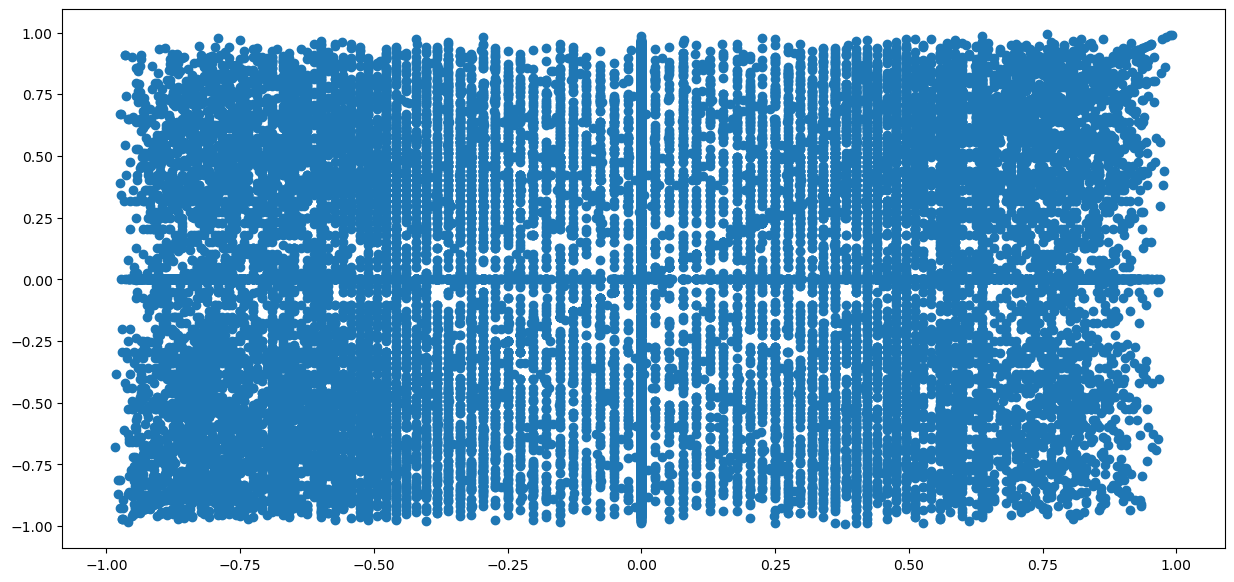

In [165]:
#plotting the sentiment scores
fig, ax = plt.subplots(figsize=(15,7))
plt.scatter(out['first_score'],out['last_score'])

In [247]:
#sort the movies according to sentiment
sentiment_df=pd.read_csv('sentiment_range.csv')
pageviews=pd.read_csv('handled_data/movies_wikipedia_pageviews.csv')
#happy ending movies
happy_ending=sentiment_df[sentiment_df['last_score']>0]

print(happy_ending.head())
#sad ending movies
sad_ending=sentiment_df[sentiment_df['last_score']<0]
print(sad_ending.head())
happy_names=happy_ending.merge(data,left_on='movie_id',right_on='wikipedia_id')[['movie_id','name']]
happy_pageviews=happy_names.merge(pageviews,left_on='name',right_on='name')




    Unnamed: 0  movie_id  first_score  last_score
0            0  23890098       0.0083      0.0083
2            2  20663735      -0.8271      0.6705
3            3   2231378      -0.4215      0.8020
7            7  24225279       0.0000      0.8957
10          10  15401493       0.7717      0.8360
    Unnamed: 0  movie_id  first_score  last_score
4            4    595909       0.4019     -0.5106
5            5   5272176       0.0000     -0.6486
6            6   1952976       0.0000     -0.6369
9            9  20532852       0.0000     -0.3182
11          11  18188932      -0.8720     -0.6369


0.0

In [286]:
names_sentiment=sentiment_df.merge(data,left_on='movie_id',right_on="wikipedia_id")
# names_sentiment=names_sentiment[['movie_id','name','first_score','last_score']]


In [287]:
names_sentiment.to_csv('names_sentiment_all.csv')

In [294]:
sent_pageviews=names_sentiment.merge(pageviews,left_on='name',right_on='name')
sent_pageviews=sent_pageviews[['movie_id','name','first_score','last_score','pageviews']]

In [327]:
sent_pageviews_sorted=sent_pageviews.sort_values('pageviews',ascending=0)
sent_pageviews_sorted

,movie_id,name,first_score,last_score,pageviews
14590,30007,The Matrix,0.0000,0.0000,371788.721591
19742,471755,Doctor Who,-0.8020,0.3612,293771.607708
17611,24759927,Don't Look Up,-0.8934,-0.6124,259033.395751
7043,23669556,Friends,0.0000,0.1280,247536.067441
7045,5671546,Friends,0.6486,0.6124,247536.067441
...,...,...,...,...,...
25903,29145240,The Alpha Incident,-0.5423,-0.8807,NaN
25904,23909982,Hercules the Invincible,0.4767,0.2960,NaN
25913,34038729,The Movie,0.7096,-0.1010,NaN
25923,16719327,If You Were Me,0.0000,0.0000,NaN


In [290]:
#fit a linear regression model on the beginning and ending coeffcients

import statsmodels.formula.api as smf

mod = smf.ols(formula='pageviews ~ first_score + last_score', data=sent_pageviews[sent_pageviews['pageviews']>1000])
np.random.seed(2)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pageviews   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.731
Date:                Fri, 23 Dec 2022   Prob (F-statistic):            0.00326
Time:                        13:33:44   Log-Likelihood:            -1.0461e+05
No. Observations:                9285   AIC:                         2.092e+05
Df Residuals:                    9282   BIC:                         2.092e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9183.2114    197.458     46.507      0.000    8796.149    9570.273
first_score  -955.8254    427.713     -2.235      0.025   -1794.237    -117.414
last_score   1126.3367    410.169      2.746      0.006     322.315    1930.358
==============================================================================
Omnibus:                    10788.726   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1320216.363
Skew:                           6.092   Prob(JB):                         0.00
Kurtosis:                      60.132   Cond. No.                         2.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

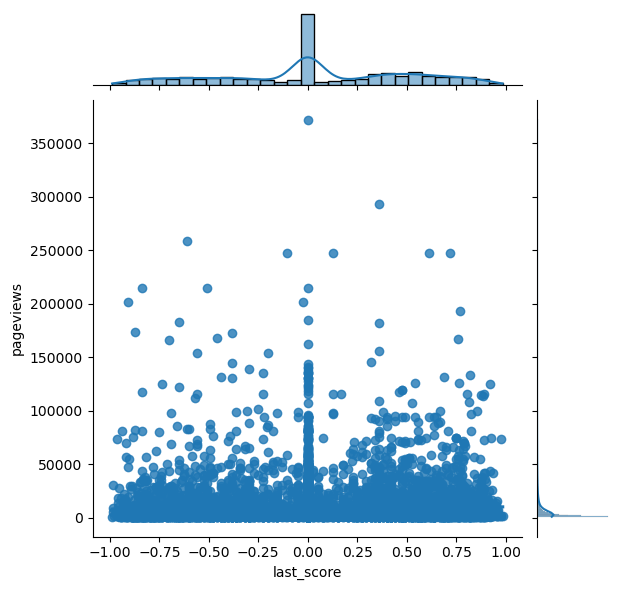

In [130]:
#show the relationship between ending sentiment and pageviews

import seaborn as sns

h = sns.jointplot(data=sent_pageviews[sent_pageviews['pageviews']>1000], x='last_score', y='pageviews', kind="reg");

In [326]:
get_summaries_df('Action')

8798


,movie_id,name,summary,length,num_words,genres
0,31186339,The Hunger Games,The nation of Panem consists of a wealthy Capi...,4559,778,"(Action/Adventure, Science Fiction, Action, Dr..."
1,20663735,Narasimham,Poovalli Induchoodan is sentenced for six yea...,3099,496,"(Musical, Action, Drama, Bollywood)"
2,5272176,End Game,The president is on his way to give a speech. ...,1937,344,"(Thriller, Action/Adventure, Action, Drama)"
3,1335380,Exodus,The film is based on the events that happened ...,4385,782,"(War film, Epic, Action/Adventure, Period piec..."
4,4596602,Ashes to Ashes,"Ashes to Ashes is set in London, England. The ...",2513,416,"(Thriller, Crime Fiction, Indie, Martial Arts ..."
...,...,...,...,...,...,...
5863,277160,Entrapment,"Virginia ""Gin"" Baker is an investigator for W...",2391,429,"(Action/Adventure, Crime Thriller, Action, Cri..."
5864,20402406,Season of the Witch,"In the 13th century, three women accused of wi...",5419,959,"(Thriller, Science Fiction, Adventure, Superna..."
5865,21972773,Guiness Vision,"The film revolves around Nandhan , a Lankan yo...",400,68,(Action)
5866,25758881,"Little Tokyo, U.S.A.","The story, set in late 1941, follows Los Angel...",1599,259,"(Action, Drama)"


In [309]:
# sent_range=
sent_pageviews.head()

,movie_id,name,first_score,last_score,pageviews
0,23890098,Taxi Blues,0.0083,0.0083,344.045455
1,2231378,The Lemon Drop Kid,-0.4215,0.8020,1310.230237
2,595909,A Cry in the Dark,0.4019,-0.5106,483.637187
3,20532852,Destination Meatball,0.0000,-0.3182,26.397233
4,15401493,Husband for Hire,0.7717,0.8360,434.850296


In [373]:
# sent_range=pd.read_csv('sentiment_range.csv')
sent_range=sent_pageviews_sorted
no_neutral_mask=(sent_range['first_score']!=0) & (sent_range['last_score']!=0)

sent_range=sent_range[no_neutral_mask]
sent_range=sent_range[['movie_id','first_score','last_score','pageviews']]
# no_neutral_mask
def sentiment_genre(genre):
    df=get_summaries_df(genre)
    
    out=df.merge(sent_range,left_on='movie_id',right_on='movie_id')[['movie_id','name','first_score','last_score','pageviews']] #
    out['genre']=str(genre)
    
    return out.sort_values('pageviews',ascending=0).head(500)   #  #out.sample(1000,replace=True) 
sent_range

,movie_id,first_score,last_score,pageviews
19742,471755,-0.8020,0.3612,293771.607708
17611,24759927,-0.8934,-0.6124,259033.395751
7045,5671546,0.6486,0.6124,247536.067441
7044,20657842,0.5859,-0.1027,247536.067441
7042,5521767,0.5106,0.7184,247536.067441
...,...,...,...,...
25818,27894969,0.8910,-0.4199,NaN
25903,29145240,-0.5423,-0.8807,NaN
25904,23909982,0.4767,0.2960,NaN
25913,34038729,0.7096,-0.1010,NaN


In [375]:
# all=pd.DataFrame()
# for g in genres_list:
#     tmp=sentiment_genre(g)
#     all=pd.concat([all,tmp])
    
# all.to_csv('sentiment_scatter_all.csv')


best=pd.DataFrame()
for g in genres_list:
    tmp=sentiment_genre(g)
    best=pd.concat([all,tmp])
    
best.to_csv('sentiment_scatter_best_500.csv')



8798
5280
8744
34007
6948
4963
16349
7155
3052
10234
5280
8141
4598
5250
6897
9094


In [366]:
fig=px.scatter(all,x='first_score',y='last_score',color='genre',hover_data=['name'],labels={'first_score':'beginning sentiment','last_score':'ending sentiment'})
fig.write_html("plotly/sentiment_scatter_all_15.html")
fig


In [376]:
best=pd.read_csv('sentiment_scatter_best_500.csv')
fig=px.scatter(best,x='first_score',y='last_score',color='genre',hover_data=['name'],
            title='Sentiment at the beginning and ending of movies by genre',
            labels={'first_score':'beginning sentiment','last_score':'ending sentiment'})
            
fig.write_html("plotly/sentiment_scatter_best_15.html")
fig

